##Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

Goals: Implementasi Matrix terhadap sebuah pengolahan gambar khususnya Edge Detection dan melakukan manipulasi gambar dengan perkalian matrix



##Import Library

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt

## Load Image

Download gambar pada [link](https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg) berikut ini, kemudian upload gambar di google colab.

In [3]:
#import library PIL yang digunakan ntuk membaca gambar
from PIL import Image

image = Image.open('anjing.jpg')

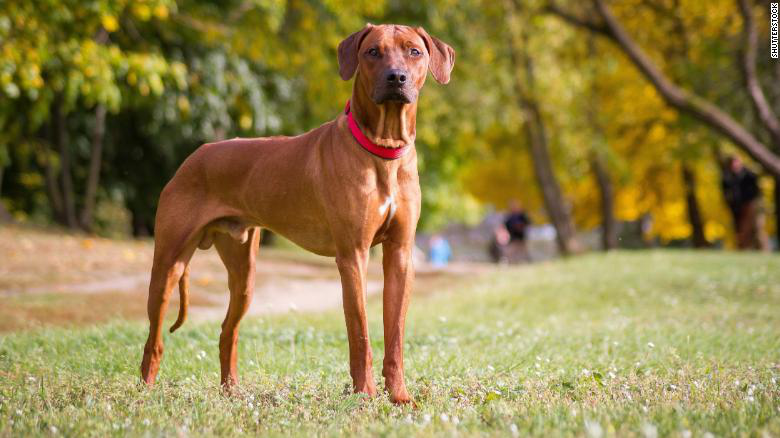

In [13]:
# Print Original Pictures
image

##Data Transformation

Kita bisa ubah tipe data image ke tensor seperti berikut ini:

In [14]:
img = np.array(image)

# cek ukuran tensor image
img.shape

(438, 780, 3)

##Image Data Exploration

Preprocessing gambar dengan mengambil channel RGB sehingga menjadi Matrix 2D dan hasil gambar berupa greyscale

In [15]:
#Konversi ke greyscale
R=img[:,:,0]
G=img[:,:,1]
B=img[:,:,2]
greyscale=(0.3 * R) + (0.59 * G) + (0.11 * B)

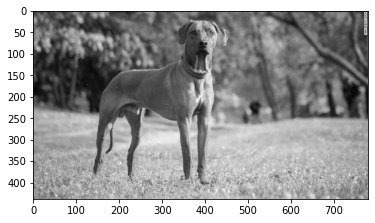

In [16]:
# Plot gambar greyscale

plt.imshow(greyscale, cmap='gray')

Langkah-langkah untuk mendeteksi edge:
1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk
masing-masing sumbu x dan y:

Vektor gradient masing-masing pada sumbu x dan y adalah:

In [19]:
dx, dy = np.gradient(greyscale)

# lihat ukuran matrix vektor gradient
print('Ukuran matrix vektor gradient sumbu-x: ', dx.shape)
print('-'*100)
print('Ukuran matrix vektor gradient sumbu-y: ', dy.shape)

Ukuran matrix vektor gradient sumbu-x:  (438, 780)
----------------------------------------------------------------------------------------------------
Ukuran matrix vektor gradient sumbu-y:  (438, 780)


Visualisasi perbandingan dari vektor gradient (dx, dy)

Text(0.5, 1.0, 'dy')

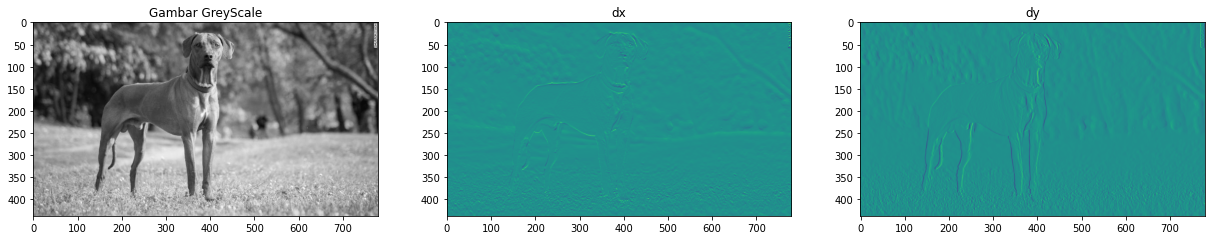

In [20]:
fig, ax = plt.subplots(ncols=3,figsize=(21,5))

ax[0].imshow(greyscale, cmap = 'gray')
ax[0].set_title('Gambar GreyScale')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')

2. Hitung gradient magnitude tiap pixel

In [21]:
# Rumus gradient magnitude adalah sebagai berikut
grad_magnitude = np.sqrt((dx**2) + (dy**2))
grad_magnitude

array([[  9.01997783,   9.65889357,   8.14300313, ...,   2.55501468,
         18.87946835,  25.55386468],
       [ 10.245     ,  10.30855955,   8.78336069, ...,   6.98822223,
          4.75975314,  27.49082938],
       [  8.75871709,   9.01050637,   7.91882093, ..., 107.27111284,
         15.16240416,  31.35775821],
       ...,
       [  6.52211622,   8.2512802 ,   9.76152908, ...,   2.33623629,
          2.85077183,   4.09351927],
       [  7.02829282,   8.43210087,   8.55361473, ...,   4.99524774,
          5.37331369,   5.58125434],
       [  7.00345629,   9.00268849,   8.94222148, ...,   5.22949567,
          6.68682286,   7.41306954]])

Langkah perhitungan gradient magnitude adalah untuk mendeteksi edge intensity dan edge direction dengan menghitung gradient gambar menggunakan edge detection operator



Visualisasi gambar dari hasil perhitungan gradient magnitude

Text(0.5, 1.0, 'Gradient Magnitude')

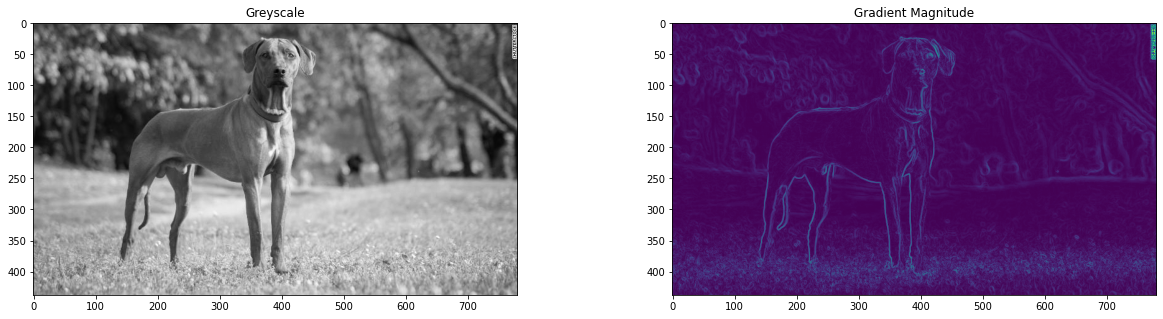

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(21,5))
ax[0].imshow(greyscale,  cmap = 'gray')
ax[0].set_title('Greyscale')
ax[1].imshow(grad_magnitude)
ax[1].set_title('Gradient Magnitude')

##Edge Detection

3. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi
(Biasanya threshold ~ 30)

Kita akan melakukan perbandingan beberapa threshold untuk mengetahui karakteristik dari edge detection 

In [25]:
grad_magnitude_60plus = np.where(grad_magnitude >= 60, 0, grad_magnitude)
grad_magnitude_30plus = np.where(grad_magnitude >= 30, 0, grad_magnitude)
grad_magnitude_20minus = np.where(grad_magnitude < 20, 0, grad_magnitude)
grad_magnitude_10minus = np.where(grad_magnitude < 10, 0, grad_magnitude)

Text(0.5, 1.0, 'Gradient Magnitude >= 60 (threshold)')

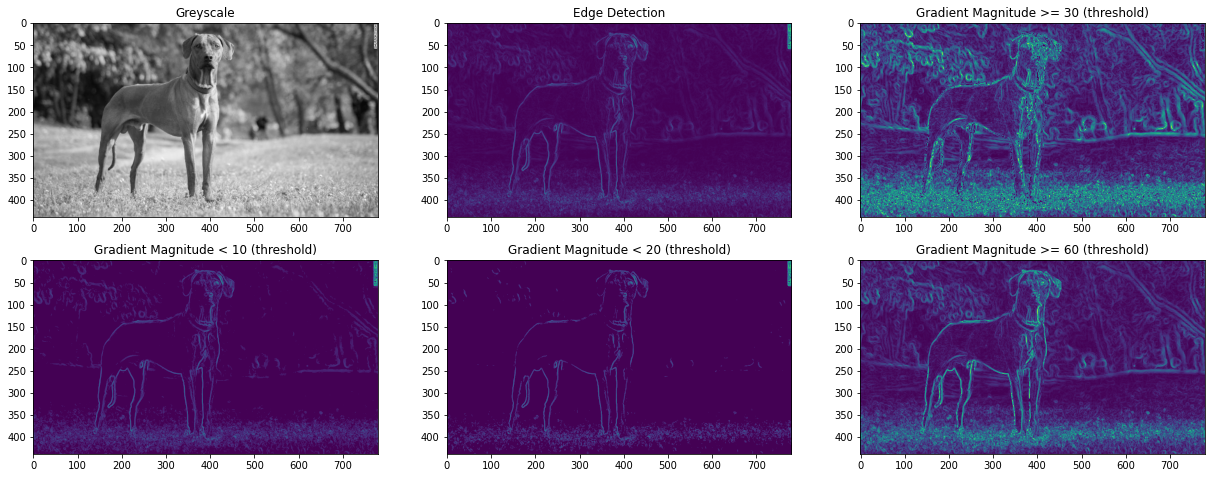

In [27]:
fig, ax = plt.subplots(2, 3,figsize=(21,8))
ax[0, 0].imshow(greyscale,  cmap = 'gray')
ax[0, 0].set_title('Greyscale')
ax[0, 1].imshow(grad_magnitude)
ax[0, 1].set_title('Edge Detection')
ax[0, 2].imshow(grad_magnitude_30plus)
ax[0, 2].set_title('Gradient Magnitude >= 30 (threshold)')
ax[1, 0].imshow(grad_magnitude_10minus)
ax[1, 0].set_title('Gradient Magnitude < 10 (threshold)')
ax[1, 1].imshow(grad_magnitude_20minus)
ax[1, 1].set_title('Gradient Magnitude < 20 (threshold)')
ax[1, 2].imshow(grad_magnitude_60plus)
ax[1, 2].set_title('Gradient Magnitude >= 60 (threshold)')

Edge Detection adalah teknik pemrosesan gambar untuk menemukan batas-batas objek dalam gambar

Standard:

Gradient Magnitude < Threshold maka bisa dikatakan bukan adalah Edge

Gradient Magnitude > Threshold maka bisa dikatakan adalah Edge



### Kesimpulan

Gradient Magnitude > Threshold (nilai threshold=30)
 kita dapat edge detection terhadap objeknya lebih jelas. Kita masih bisa lihat dengan jelas gambar seokar anjing yang berdiri di tengah hutan. Sedangkan untuk Gradient Magnitude < Threshold edge detection sebuah object cenderung kurang jelas, dari gambar di atas kita hanya dapat melihat tepi gambar dari seekor anjing dan sedikit informasi tentang tepi gambar area hutan hal ini bisa ditunjukkan dari gambar gradient magnitude < 10 dan bahkan untuk gradient magnitude < 20 hanya bisa melihat tepi gambar dari seekor anjing.




##Operasi Matrix

4. Untuk operasi matriks, buat matriks dengan nilai apapun yang
bersesuaian dengan ukuran gambar dan sesuai dengan aturan
perkalian matriks.

###a. Flip sebuah gambar dengan mengalikan Matrix Identitas

In [63]:
mt1  = np.zeros((greyscale.shape[0], greyscale.shape[0]), int)
mt1.shape

(438, 438)

In [64]:
np.fill_diagonal(mt1, 1)

In [65]:
mt1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [66]:
mt1_flip = np.flip(mt1, axis = 0)
mt1_flip

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [68]:
transform1 = mt1_flip.dot(greyscale)
transform1

array([[148.99, 141.99, 130.99, ..., 146.32, 143.32, 136.32],
       [148.77, 141.77, 132.  , ..., 141.1 , 138.88, 133.88],
       [150.25, 143.77, 134.37, ..., 136.36, 135.36, 131.36],
       ...,
       [ 64.47,  64.96,  65.34, ...,  47.87,  36.02,  60.03],
       [ 75.96,  75.96,  75.12, ...,  38.24,  56.02,  28.91],
       [ 84.96,  85.56,  82.83, ...,  40.24,  37.91,  50.91]])

Text(0.5, 1.0, 'Transform')

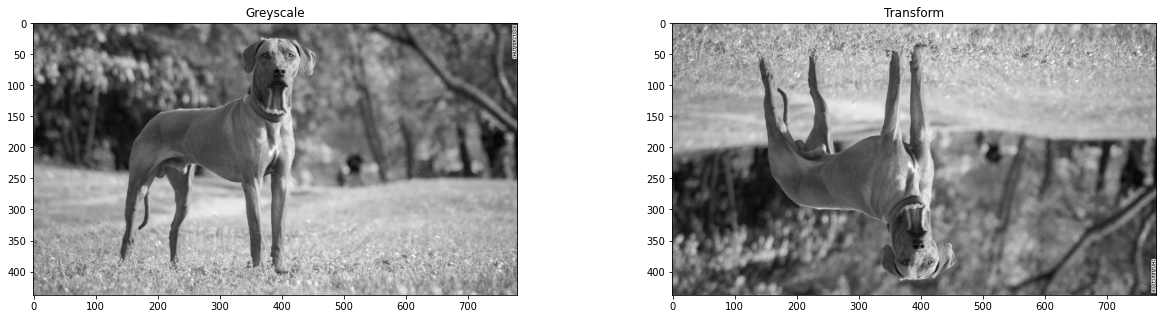

In [103]:
fig, ax = plt.subplots(ncols=2,figsize=(21,5))
ax[0].imshow(greyscale,  cmap = 'gray')
ax[0].set_title('Greyscale')
ax[1].imshow(transform1, cmap = 'gray')
ax[1].set_title('Transform')

###b. Memberikan sebuah noise terhadap gambar dengan mengalikan identitas matrix dengan nilai random kemudian flip gambar

In [95]:
from numpy import diag
k = np.random.rand(greyscale.shape[1], greyscale.shape[1])

diag1 = diag(k)
diag2 = diag(diag1)

In [96]:
diag2

array([[0.73276277, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2301394 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02651838, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08520819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45716623,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.65101953]])

In [97]:
diag2.shape

(780, 780)

In [99]:
diag2_flip = np.flip(diag2, axis = 0)
diag2_flip.shape

(780, 780)

In [100]:
noise = greyscale.dot(diag2_flip)
noise

array([[37.3049525 ,  8.72458466,  1.06709972, ...,  7.05779453,
        39.11514242, 55.31061965],
       [21.18417161, 12.8924092 ,  1.01406295, ...,  6.40083937,
        34.72634664, 49.45144384],
       [43.98774894,  8.28962119,  1.26943498, ...,  5.56750326,
        29.69751814, 41.97122939],
       ...,
       [96.25571715, 31.1516692 ,  3.61604665, ..., 11.44942474,
        65.72678853, 97.81568505],
       [98.10227933, 31.96175989,  3.74174379, ..., 11.24748132,
        64.81245607, 96.85217614],
       [99.89022048, 32.98357883,  3.88016974, ..., 11.16142105,
        64.91303264, 96.99540044]])

Text(0.5, 1.0, 'Noise and Flip')

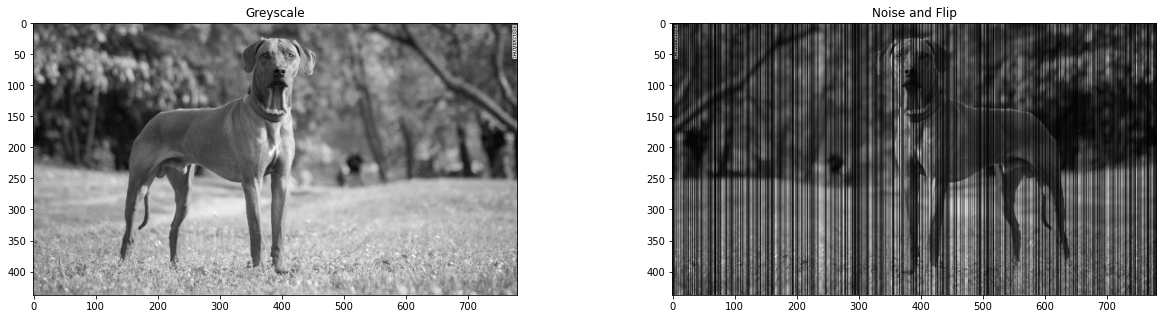

In [102]:
fig, ax = plt.subplots(ncols=2,figsize=(21,5))
ax[0].imshow(greyscale,  cmap = 'gray')
ax[0].set_title('Greyscale')
ax[1].imshow(noise, cmap = 'gray')
ax[1].set_title('Noise and Flip')